# Import

In [1]:
# Toy data 생성 및 시각화를 위한 라이브러리
import pandas as pd
import seaborn as sns
import torch
import random
import numpy as np
from torch.distributions.normal import Normal
import torch
from sklearn.preprocessing import MinMaxScaler
from torch import nn, optim  
from torch.utils.data import DataLoader, Dataset      # 데이터를 모델에 사용할 수 있게 정리해주는 라이브러리.
import torch.nn.functional as F  
import numpy as np
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import copy
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from random import randint   
from torch.utils.data import RandomSampler
from cdd import CDD

import matplotlib.pyplot as plt

# DATA

In [41]:
# import random
# bn = 4
# # x_s = list(np.random.uniform(0,np.pi*2,100)) 
# # x_t = list(np.random.uniform(0,np.pi/2,50)) + list(np.random.uniform(np.pi/2,2*np.pi,50))
# #x_t_labeled = random.sample(list(np.random.uniform(0,np.pi/2,50)), bn//3) + random.sample(list(np.random.uniform(np.pi/2,2*np.pi,50)), bn//3) + random.sample(list(np.random.uniform(2*np.pi,6*np.pi,50)), bn//3) 
# x_s = [i*np.pi*2/100 for i in range(101)] 
# x_t = [i*np.pi/2/50 for i in range(50)]+[i*np.pi*3/2/50+np.pi/2 for i in range(51)]
# #x_t_labeled = [np.pi/2/4,np.pi/4,np.pi/2/4*3,np.pi*7/8,np.pi*5/4,np.pi*13/8]
# x_t_labeled = [np.pi/2/4,np.pi/2/4*3,np.pi*7/8,np.pi*13/8]
# y_s = list(np.sin(x_s)+np.random.normal(0, 0.1, 101))
# y_s_true = list(np.sin(x_s))

# y_t_true = []
# for i in range(len(x_t)):
#     if x_t[i]<np.pi/2:
#         y_t_true.append(np.sin(2*np.array(x_t[i])))
#     elif x_t[i]<np.pi*2:
#         y_t_true.append(np.sin(2/3*(x_t[i]+np.pi)))
#     else:
#         y_t_true.append(np.sin(1/2*np.array(x_t[i]-2*np.pi)))
        
        
        
# samples = np.random.normal(0, 0.1, 101).tolist()
# y_t = []
# for i in range(len(x_t)):
#     if x_t[i]<np.pi/2:
#         y_t.append(np.sin(2*np.array(x_t[i]))+samples[i])
#     elif x_t[i]<np.pi*2:
#         y_t.append(np.sin(2/3*(x_t[i]+np.pi))+samples[i])
#     else:
#         y_t.append(np.sin(1/2*np.array(x_t[i]-2*np.pi))+samples[i])

# y_t_labeled = []
# samples = np.random.normal(0, 0.1, bn).tolist()
# for i in range(len(x_t_labeled)):
#     if x_t_labeled[i]<np.pi/2:
#         y_t_labeled.append(np.sin(2*np.array(x_t_labeled[i]))+samples[i])
#     elif x_t_labeled[i]<np.pi*2:
#         y_t_labeled.append(np.sin(2/3*(x_t_labeled[i]+np.pi))+samples[i])
#     else:
#         y_t_labeled.append(np.sin(1/2*np.array(x_t_labeled[i]-2*np.pi))+samples[i])
    

Text(0, 0.5, 'Y')

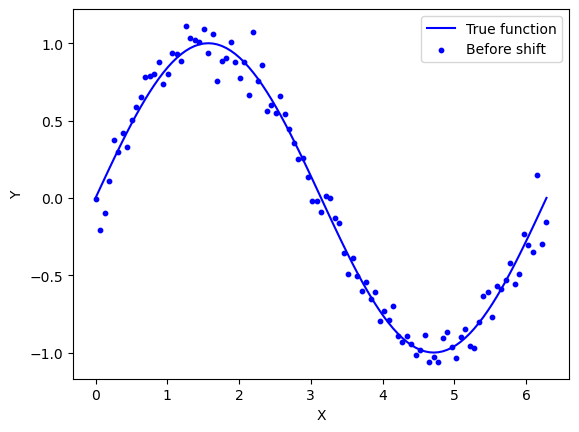

In [81]:
# import seaborn as sns
# data_s = [[x_s[i],y_s[i],'source'] for i in range(len(x_s))]
# df_s = pd.DataFrame(data_s, columns=['X','Y','domain'])


# data_s_true = [[x_s[i],y_s_true[i],'source'] for i in range(len(x_s))]
# df_s_true = pd.DataFrame(data_s_true, columns=['X','Y','domain'])
# df_s_true = df_s_true.sort_values('X')
# plt.plot(df_s_true['X'],df_s_true['Y'],c = 'b',label = 'True function')
# plt.scatter(df_s['X'],df_s['Y'],c='b',s=10,label='Before shift')



# import matplotlib.pyplot as plt
# plt.legend()
# plt.xlabel('X')
# plt.ylabel('Y')

# # data_t = [[x_t[i],y_t[i],'true_target'] for i in range(len(x_t))]
# # df_t = pd.DataFrame(data_t, columns=['X','Y','domain'])
# # data_t_labeled = [[x_t_labeled[i],y_t_labeled[i],'target_labeled'] for i in range(len(x_t_labeled))]
# # df_t_labeled = pd.DataFrame(data_t_labeled, columns=['X','Y','domain'])
# # df_total_labeled = pd.concat([df_s,df_t,df_t_labeled])
# # sns.scatterplot(data=df_total_labeled, x='X', y='Y', hue='domain')

In [7]:
pd.read_csv("./df_t_labeled.csv")
pd.read_csv("./df_total_plot_4shot_DARC.csv")

,X,Y,domain
0,0.000000,0.000000,true_source
1,0.062832,0.062791,true_source
2,0.125664,0.125333,true_source
3,0.188496,0.187381,true_source
4,0.251327,0.248690,true_source
...,...,...,...
399,5.906194,-0.387255,target_pred
400,6.000442,-0.333256,target_pred
401,6.094690,-0.279258,target_pred
402,6.188938,-0.225298,target_pred


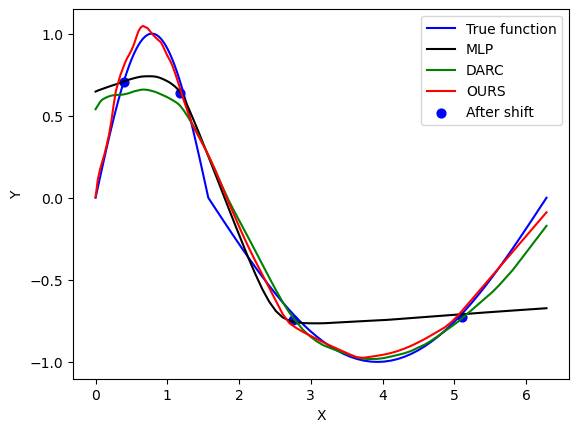

In [3]:
df_t_true = pd.read_csv("./df_t_true.csv")
df_t_true = df_t_true.sort_values('X')
plt.plot(df_t_true['X'],df_t_true['Y'],c = 'b',label = 'True function')



df_t_plot = pd.read_csv("./df_t_plot_4shot_MLP.csv")

df_t_plot = df_t_plot.sort_values('X')
plt.plot(df_t_plot['X'],df_t_plot['Y'],c = 'black',label = 'MLP')
df_t_plot = pd.read_csv("./df_total_plot_4shot_DARC.csv")
df_t_plot = df_t_plot[df_t_plot['domain']=='target_pred']
df_t_plot = df_t_plot.sort_values('X')
plt.plot(df_t_plot['X'],df_t_plot['Y'],c = 'g',label = 'DARC')
df_t_plot = pd.read_csv("./df_total_labeled_4shot_mapper.csv")
df_t_plot = df_t_plot[df_t_plot['domain']=='target_pred']
df_t_plot = df_t_plot.sort_values('X')
plt.plot(df_t_plot['X'],df_t_plot['Y'],c = 'r',label = 'OURS')

df_t_labeled = pd.read_csv("./df_t_labeled.csv")
plt.scatter(df_t_labeled['X'],df_t_labeled['Y'],c='b',s=40,label='After shift')

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()


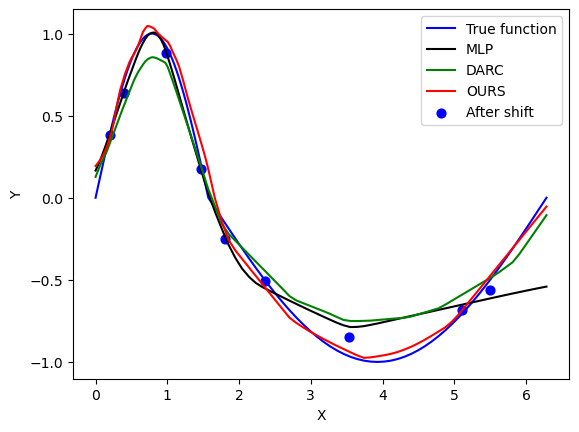

In [4]:
df_t_true = pd.read_csv("./df_t_true_9.csv")
df_t_true = df_t_true.sort_values('X')
plt.plot(df_t_true['X'],df_t_true['Y'],c = 'b',label = 'True function')



df_t_plot = pd.read_csv("./df_t_plot_9shot_MLP.csv")

df_t_plot = df_t_plot.sort_values('X')
plt.plot(df_t_plot['X'],df_t_plot['Y'],c = 'black',label = 'MLP')
df_t_plot = pd.read_csv("./df_total_plot_9shot_DARC.csv")
df_t_plot = df_t_plot[df_t_plot['domain']=='target_pred']
df_t_plot = df_t_plot.sort_values('X')
plt.plot(df_t_plot['X'],df_t_plot['Y'],c = 'g',label = 'DARC')
df_t_plot = pd.read_csv("./df_total_labeled_9shot_mapper.csv")
df_t_plot = df_t_plot[df_t_plot['domain']=='target_pred']
df_t_plot = df_t_plot.sort_values('X')
plt.plot(df_t_plot['X'],df_t_plot['Y'],c = 'r',label = 'OURS')

df_t_labeled = pd.read_csv("./df_t_labeled_9.csv")
plt.scatter(df_t_labeled['X'],df_t_labeled['Y'],c='b',s=40,label='After shift')

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()


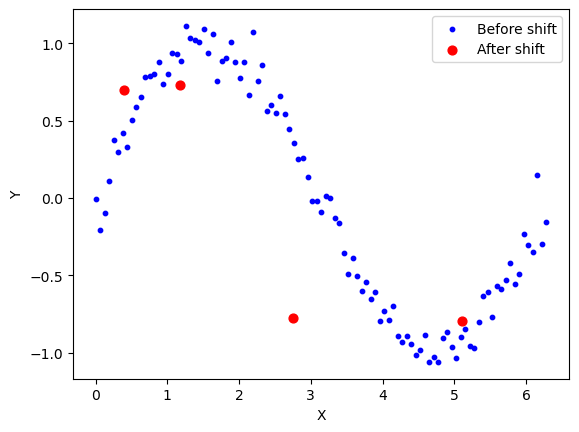

In [83]:

plt.scatter(df_s['X'],df_s['Y'],c='b',s=10,label='Before shift')
plt.scatter(df_t_labeled['X'],df_t_labeled['Y'],c='r',s=40,label='After shift')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

In [4]:
x_s = torch.tensor(x_s).reshape(-1,1).type(torch.float32)
x_t =torch.tensor(x_t).reshape(-1,1).type(torch.float32)
x_t_labeled =torch.tensor(x_t_labeled).reshape(-1,1).type(torch.float32)

In [5]:
y_s = torch.tensor(y_s).reshape(-1,1).type(torch.float32)
y_t =torch.tensor(y_t).reshape(-1,1).type(torch.float32)
y_t_labeled =torch.tensor(y_t_labeled).reshape(-1,1).type(torch.float32)

# Model

In [6]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.h1 = nn.Linear(1, 256)
        self.relu = nn.ReLU()
        self.h2 = nn.Linear(256, 256)
        self.h3 = nn.Linear(256, 256)
        self.h4 = nn.Linear(256,10)
        self.reg = nn.Linear(10, 1)
        
        
        
    def forward(self, x):
        h1_x = self.h1(x)
        h1_x = self.relu(h1_x)
        h1_x = self.h2(h1_x)
        h1_x = self.relu(h1_x)
        h1_x = self.h3(h1_x)
        h1_x = self.relu(h1_x)
        h1_x = self.h4(h1_x)
        h1_x = self.relu(h1_x)
        h1_x = self.reg(h1_x)

        return h1_x
    
    def output(self, x):
        h1_x = self.h1(x)
        h1_x = self.relu(h1_x)
        h1_x = self.h2(h1_x)
        h1_x = self.relu(h1_x)
        h1_x = self.h3(h1_x)
        h1_x = self.relu(h1_x)
        h1_x = self.h4(h1_x)
        f_x = self.relu(h1_x)
        y_hat = self.reg(h1_x)
        return {'f_x':f_x, 'output':y_hat}


# Pretrained Regressor

In [7]:
model = Net()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

for epoch in range(10000):
    optimizer.zero_grad()

    model_output_s = model.output(x_s)
    latent_x_s = model_output_s['f_x']
    y_s_hat = model_output_s['output']



    # mse loss
    y_s_mse = torch.nn.functional.mse_loss(y_s_hat, y_s)
    y_s_mse.backward()
    if epoch % 100 == 0:
        print(f"Epoch : {epoch}, total_loss = {y_s_mse}")
    optimizer.step()
    

Epoch : 0, total_loss = 0.5525369048118591
Epoch : 100, total_loss = 0.10934600234031677
Epoch : 200, total_loss = 0.07424796372652054
Epoch : 300, total_loss = 0.04187510162591934
Epoch : 400, total_loss = 0.010693698190152645
Epoch : 500, total_loss = 0.0018295790068805218
Epoch : 600, total_loss = 0.00046639182255603373
Epoch : 700, total_loss = 0.00017730025865603238
Epoch : 800, total_loss = 9.400826820638031e-05
Epoch : 900, total_loss = 8.688728121342137e-05
Epoch : 1000, total_loss = 2.773629421426449e-05
Epoch : 1100, total_loss = 1.8721048036240973e-05
Epoch : 1200, total_loss = 1.3477269931172486e-05
Epoch : 1300, total_loss = 9.40967038332019e-06
Epoch : 1400, total_loss = 0.0003819853882305324
Epoch : 1500, total_loss = 5.44575959793292e-06
Epoch : 1600, total_loss = 4.523592906480189e-06
Epoch : 1700, total_loss = 3.536614485710743e-06
Epoch : 1800, total_loss = 2.8477707019192167e-06
Epoch : 1900, total_loss = 2.640666025399696e-06
Epoch : 2000, total_loss = 2.1087164441

KeyboardInterrupt: 

# Domain Shift -> performance effect

In [8]:
model_output_s = model.output(x_s)
latent_x_s = model_output_s['f_x']
y_s_hat = model_output_s['output']

model_output_t_labeled = model.output(x_t_labeled)
latent_x_t_labeled = model_output_t_labeled['f_x']
y_t_labeled_hat = model_output_t_labeled['output']

model_output_t = model.output(x_t)
latent_x_t = model_output_t['f_x']
y_t_hat = model_output_t['output']

# mse loss
y_s_mse = torch.nn.functional.mse_loss(y_s_hat, y_s)
y_t_mse = torch.nn.functional.mse_loss(y_t_labeled_hat, y_t_labeled)
y_t_real_mse = torch.nn.functional.mse_loss(y_t_hat, y_t)

print(f"source mse : {y_s_mse}, labeled target mse : {y_t_mse}, target mse : {y_t_real_mse}")

source mse : 8.504466677550226e-06, labeled target mse : 0.2600259482860565, target mse : 0.3216908574104309


<Axes: xlabel='X', ylabel='Y'>

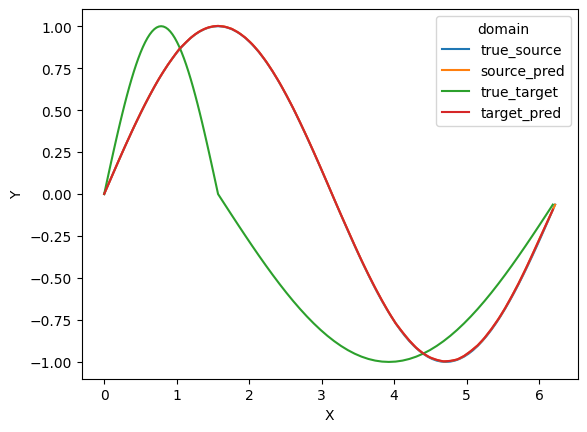

In [9]:
import seaborn as sns
data_s = [[x_s[i].item(),y_s[i].item(),'true_source'] for i in range(len(x_s))]
df_s = pd.DataFrame(data_s, columns=['X','Y','domain'])
df_s = df_s.sort_values('X')
data_s_hat = [[x_s[i].item(),y_s_hat[i].item(),'source_pred'] for i in range(len(x_s))]
df_s_hat = pd.DataFrame(data_s_hat, columns=['X','Y','domain'])
df_s_hat = df_s_hat.sort_values('X')

data_t = [[x_t[i].item(),y_t[i].item(),'true_target'] for i in range(len(x_t))]
df_t = pd.DataFrame(data_t, columns=['X','Y','domain'])
df_t = df_t.sort_values('X')
data_t_hat = [[x_t[i].item(),y_t_hat[i].item(),'target_pred'] for i in range(len(x_t))]
df_t_hat = pd.DataFrame(data_t_hat, columns=['X','Y','domain'])
df_t_hat = df_t_hat.sort_values('X')

df_total_labeled = pd.concat([df_s, df_s_hat, df_t,df_t_hat])
sns.lineplot(data=df_total_labeled, x='X', y='Y', hue='domain')

# Mapper

In [11]:
class Mapper(nn.Module):
    def __init__(self):
        super().__init__()
        self.h1 = nn.Linear(1, 16)
        self.relu = nn.ReLU()
        self.h2 = nn.Linear(16, 16)
        self.h3 = nn.Linear(16, 16)
        self.reg = nn.Linear(16, 1)
        
        
        
        
    def forward(self, x):
        h1_x = self.h1(x)
        h1_x = self.relu(h1_x)
        h1_x = self.h2(h1_x)
        h1_x = self.relu(h1_x)
        h1_x = self.h3(h1_x)
        h1_x = self.relu(h1_x)
        h1_x = self.reg(h1_x)


        return h1_x
    
    def output(self, x):
        h1_x = self.h1(x)
        h1_x = self.relu(h1_x)
        h1_x = self.h2(h1_x)
        h1_x = self.relu(h1_x)
        h1_x = self.h3(h1_x)
        f_x = self.relu(h1_x)
        y_hat = self.reg(h1_x)
        return {'f_x':f_x, 'output':y_hat}


In [12]:
mapper = Mapper()
optimizer = optim.Adam(mapper.parameters(), lr=0.0001)
best_mapper = copy.deepcopy(mapper)
best_loss = 1000
loss_list = []
for epoch in range(20000):
    optimizer.zero_grad()

    latent_x_s = x_s
    
    mapper_output_t_labeled = mapper.output(x_t_labeled)
    latent_x_t_labeled = mapper_output_t_labeled['output']
    
    
    # source latent에서 batch 추출
    batch_latent_x_s_index = torch.randperm(latent_x_s.size(0))[:bn]
    batch_latent_x_s = latent_x_s[batch_latent_x_s_index]


    # cdd loss
    feats_toalign_S = [batch_latent_x_s, torch.tensor([1]).repeat(len(batch_latent_x_s),1)]
    feats_toalign_T = [latent_x_t_labeled, torch.tensor([1]).repeat(len(latent_x_t_labeled),1)]
    cdd = CDD(kernel_num=(10,10), kernel_mul=(2,2), num_layers=2, num_classes=1, intra_only=True)
    cdd_loss = cdd.forward(feats_toalign_S, feats_toalign_T, [bn], [bn])['cdd']

    # ns loss
    epsilon_k = 3

    f_s_vector = latent_x_s
    f_t_vector = latent_x_t_labeled

    from sklearn.neighbors import KNeighborsRegressor
    knn = KNeighborsRegressor(n_neighbors=epsilon_k)
    knn.fit(y_s, np.array(range(len(y_s))))
    total_ns_loss = 0
    for i in range(bn):
        best_dist = 1000
        error = 0
        neighbors = knn.kneighbors(y_t_labeled[i].reshape(-1,1))[1][0].tolist()
        for index_i in neighbors:
            temp_f_dist = torch.abs(f_t_vector[i] - f_s_vector[index_i]).norm()
            temp_y_dist = torch.abs(y_t_labeled[i] - y_s[index_i]).norm()
            if best_dist > temp_f_dist + temp_y_dist:
                best_dist = temp_f_dist + temp_y_dist
                error = temp_f_dist
        total_ns_loss += error
    ns_loss = total_ns_loss / bn

    total_loss = cdd_loss + ns_loss
    
    if best_loss > total_loss:
        best_loss = total_loss
        best_mapper = copy.deepcopy(mapper)
    total_loss.backward()

    loss_list.append(total_loss.item())
    if epoch % 100 == 0:
        print(f"Epoch : {epoch}, total_loss = {np.mean(np.array(loss_list))}")
        loss_list = []
    optimizer.step()

Epoch : 0, total_loss = 9.07714557647705
Epoch : 100, total_loss = 8.527845406532288
Epoch : 200, total_loss = 7.53078414440155
Epoch : 300, total_loss = 6.29172637462616
Epoch : 400, total_loss = 5.5720573949813845
Epoch : 500, total_loss = 4.124977513551712
Epoch : 600, total_loss = 2.8587818336486817
Epoch : 700, total_loss = 2.3321389210224153
Epoch : 800, total_loss = 1.9187689715623855
Epoch : 900, total_loss = 1.484960719347
Epoch : 1000, total_loss = 1.2683692055940627
Epoch : 1100, total_loss = 1.0930008500814439
Epoch : 1200, total_loss = 1.1817263448238373
Epoch : 1300, total_loss = 1.114707828760147
Epoch : 1400, total_loss = 1.1676566317677497
Epoch : 1500, total_loss = 1.155241271853447
Epoch : 1600, total_loss = 1.034608552455902
Epoch : 1700, total_loss = 1.0154610145092011
Epoch : 1800, total_loss = 1.0138845241069794
Epoch : 1900, total_loss = 1.0156344905495645
Epoch : 2000, total_loss = 0.9610153651237487
Epoch : 2100, total_loss = 0.9403632017970085
Epoch : 2200, t

# Domain Adaptation -> Performance

In [13]:
# model_output_s = model.output(x_s)
# latent_x_s = model_output_s['f_x']
# y_s_hat = model_output_s['output']

# f_t_labeled = best_mapper.output(x_t_labeled)['output']
# model_output_t_labeled = model.output(f_t_labeled)
# latent_x_t_labeled = model_output_t_labeled['f_x']
# y_t_labeled_hat = model_output_t_labeled['output']

# f_t = best_mapper.output(x_t)['output']
# model_output_t = model.output(f_t)
# latent_x_t = model_output_t['f_x']
# y_t_hat = model_output_t['output']

# # mse loss
# y_s_mse = torch.nn.functional.mse_loss(y_s_hat, y_s)
# y_t_mse = torch.nn.functional.mse_loss(y_t_labeled_hat, y_t_labeled)
# y_t_real_mse = torch.nn.functional.mse_loss(y_t_hat, y_t)

# print(f"source mse : {y_s_mse}, labeled target mse : {y_t_mse}, target mse : {y_t_real_mse}")

source mse : 8.504466677550226e-06, labeled target mse : 0.0019408613443374634, target mse : 0.009726251475512981


<Axes: xlabel='X', ylabel='Y'>

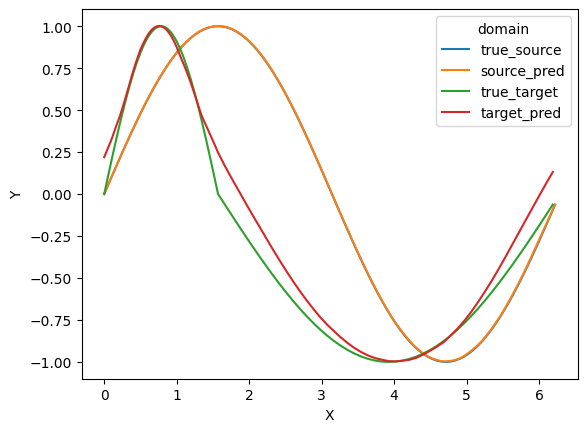

In [14]:
# import seaborn as sns
# data_s = [[x_s[i].item(),y_s[i].item(),'true_source'] for i in range(len(x_s))]
# df_s = pd.DataFrame(data_s, columns=['X','Y','domain'])
# df_s = df_s.sort_values('X')
# data_s_hat = [[x_s[i].item(),y_s_hat[i].item(),'source_pred'] for i in range(len(x_s))]
# df_s_hat = pd.DataFrame(data_s_hat, columns=['X','Y','domain'])
# df_s_hat = df_s_hat.sort_values('X')

# data_t = [[x_t[i].item(),y_t[i].item(),'true_target'] for i in range(len(x_t))]
# df_t = pd.DataFrame(data_t, columns=['X','Y','domain'])
# df_t = df_t.sort_values('X')
# data_t_hat = [[x_t[i].item(),y_t_hat[i].item(),'target_pred'] for i in range(len(x_t))]
# df_t_hat = pd.DataFrame(data_t_hat, columns=['X','Y','domain'])
# df_t_hat = df_t_hat.sort_values('X')

# df_total_labeled = pd.concat([df_s, df_s_hat, df_t,df_t_hat])
# sns.lineplot(data=df_total_labeled, x='X', y='Y', hue='domain')

In [15]:
model_output_s = model.output(x_s)
latent_x_s = model_output_s['f_x']
y_s_hat = model_output_s['output']

f_t_labeled = mapper.output(x_t_labeled)['output']
model_output_t_labeled = model.output(f_t_labeled)
latent_x_t_labeled = model_output_t_labeled['f_x']
y_t_labeled_hat = model_output_t_labeled['output']

f_t = mapper.output(x_t)['output']
model_output_t = model.output(f_t)
latent_x_t = model_output_t['f_x']
y_t_hat = model_output_t['output']

# mse loss
y_s_mse = torch.nn.functional.mse_loss(y_s_hat, y_s)
y_t_mse = torch.nn.functional.mse_loss(y_t_labeled_hat, y_t_labeled)
y_t_real_mse = torch.nn.functional.mse_loss(y_t_hat, y_t)

print(f"source mse : {y_s_mse}, labeled target mse : {y_t_mse}, target mse : {y_t_real_mse}")

source mse : 8.504466677550226e-06, labeled target mse : 0.00029249413637444377, target mse : 0.0047261654399335384


<Axes: xlabel='X', ylabel='Y'>

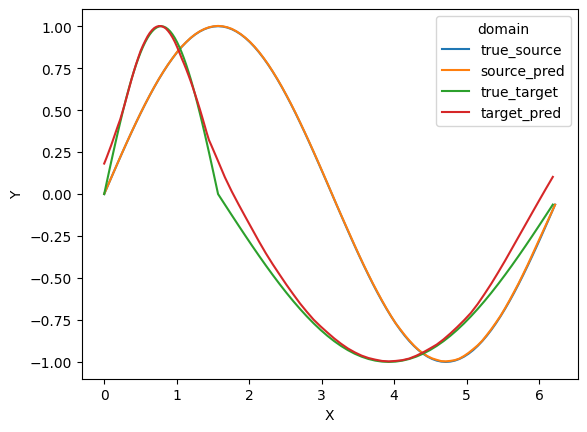

In [16]:
import seaborn as sns
data_s = [[x_s[i].item(),y_s[i].item(),'true_source'] for i in range(len(x_s))]
df_s = pd.DataFrame(data_s, columns=['X','Y','domain'])
df_s = df_s.sort_values('X')
data_s_hat = [[x_s[i].item(),y_s_hat[i].item(),'source_pred'] for i in range(len(x_s))]
df_s_hat = pd.DataFrame(data_s_hat, columns=['X','Y','domain'])
df_s_hat = df_s_hat.sort_values('X')

data_t = [[x_t[i].item(),y_t[i].item(),'true_target'] for i in range(len(x_t))]
df_t = pd.DataFrame(data_t, columns=['X','Y','domain'])
df_t = df_t.sort_values('X')
data_t_hat = [[x_t[i].item(),y_t_hat[i].item(),'target_pred'] for i in range(len(x_t))]
df_t_hat = pd.DataFrame(data_t_hat, columns=['X','Y','domain'])
df_t_hat = df_t_hat.sort_values('X')

df_total_labeled = pd.concat([df_s, df_s_hat, df_t,df_t_hat])
sns.lineplot(data=df_total_labeled, x='X', y='Y', hue='domain')

In [ ]:
# 1% MMD + NS (Mapper 3구간 1점)
# 3.3% MMD + NS (Mapper 3구간)
# 3.3% 5*MMD + NS [BEST] (Mapper 3구간 MMD5배)
# 3.3% NS (Mapper 3구간 NS만)
# 3.3% MMD (Mapper 3구간 MMD만)
# 6.6% MMD + NS (Mapper 3구간 6점6)
# 3.3% Shared(MMD+NS+MSE) (Shared_30)
# 3.3%(True Target X -> 15, 10, 5) MMD+NS (Mapper 3구간 분포변화)
# 3.3%(True Target X -> 15, 10, 5) 5*MMD+NS (Mapper 3구간 분포변화 MMD5배)
# 3.3%(True Target X -> 15, 10, 5) 1/2*MMD+NS [NOT BAD] (Mapper 3구간 분포변화 MMD반)

# NS만 하거나 MMD만 하는 것보단, 둘다 하는 것이 좋다

# Sample Target ~~ True Target => MMD의 계수 높일수록 좋고
# Sample Target ~!~ True Target => MMD의 계수를 낮출수록 좋다 